<div align="center">

<h1 style="font-size: 2em;">Welcome to Logistic Regression!</h1>

<img src="logitic.png" alt="Deep" style="width: 60%; margin: 20px 0;" />

<h2 style="font-size: 1.5em;">Let's dive </h2>

</div>


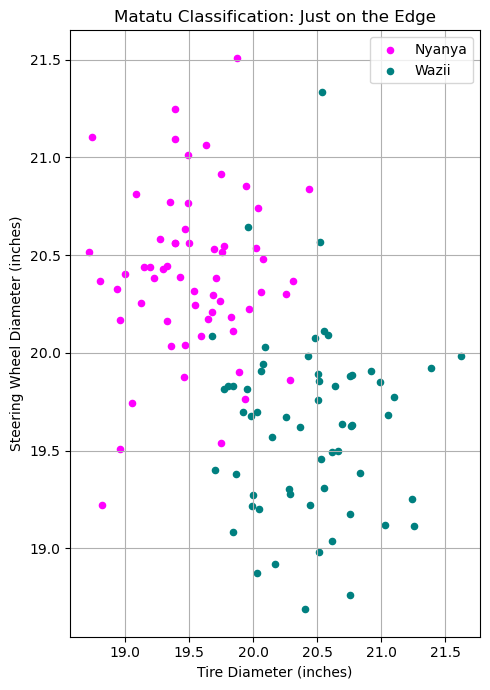

In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

nyanya_tire_diameter = np.random.normal(19.6, 0.45, 60)
nyanya_steering_diameter = np.random.normal(20.4, 0.45, 60)

wazii_tire_diameter = np.random.normal(20.4, 0.45, 60)
wazii_steering_diameter = np.random.normal(19.6, 0.45, 60)

nyanya_df = pd.DataFrame({
    'Tire_Diameter': nyanya_tire_diameter,
    'Steering_Diameter': nyanya_steering_diameter,
    'Label': 'Nyanya'
})

wazii_df = pd.DataFrame({
    'Tire_Diameter': wazii_tire_diameter,
    'Steering_Diameter': wazii_steering_diameter,
    'Label': 'Wazii'
})

data = pd.concat([nyanya_df, wazii_df])

plt.figure(figsize=(5, 7))
for label, color in zip(['Nyanya', 'Wazii'], ['magenta', 'teal']):
    subset = data[data['Label'] == label]
    plt.scatter(subset['Tire_Diameter'], subset['Steering_Diameter'], label=label, color=color, s=20)

plt.legend()
plt.grid(True)
plt.title("Matatu Classification: Just on the Edge")
plt.xlabel("Tire Diameter (inches)")
plt.ylabel("Steering Wheel Diameter (inches)")
plt.tight_layout()
plt.show()


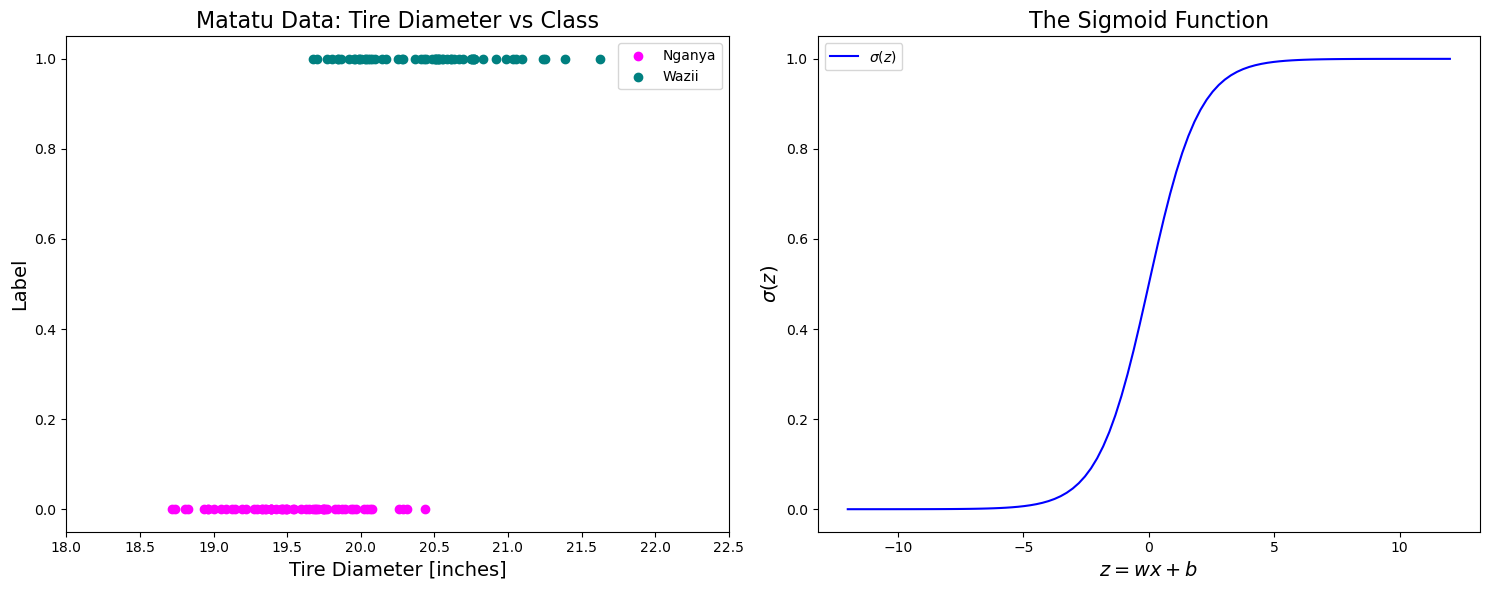

In [397]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

df = pd.read_csv("Mats.csv")
y = df.iloc[0:50].Label.values

X= df[["Tire_Diameter" , "Steering_Diameter"]].iloc[:119].values

nganya = df[df['Label'] == 'Nyanya']
wazii = df[df['Label'] == 'Wazii']

# Plot setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.set_xlim((18.0, 22.5))
ax1.scatter(nganya['Tire_Diameter'], 
            np.zeros(len(nganya)), 
            color="magenta", 
            label="Nganya")
ax1.scatter(wazii['Tire_Diameter'], 
            np.ones(len(wazii)), 
            color="teal", 
            label="Wazii")

ax1.set_xlabel("Tire Diameter [inches]", fontsize=14)
ax1.set_ylabel("Label", fontsize=14)
ax1.set_title("Matatu Data: Tire Diameter vs Class", fontsize=16)
ax1.legend()

domain = np.linspace(-12, 12, 100)
ax2.plot(domain, sigmoid(domain), color="blue", label=r"$\sigma(z)$")
ax2.set_xlabel(r"$z = wx + b$", fontsize=14)
ax2.set_ylabel(r"$\sigma(z)$", fontsize=14)
ax2.set_title("The Sigmoid Function", fontsize=16)
ax2.legend()

plt.tight_layout()
plt.show()


In [398]:
from mlxtend.plotting import plot_decision_regions
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 100):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [399]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)
df = pd.read_csv("Mats.csv")
X = df.iloc[50:].Tire_Diameter.values
X = X.reshape(-1, 1)
y = np.where(df.iloc[50:].Label == "Nyanya", 0, 1)

node.train(X, y, alpha = 0.01, epochs = 10_000)

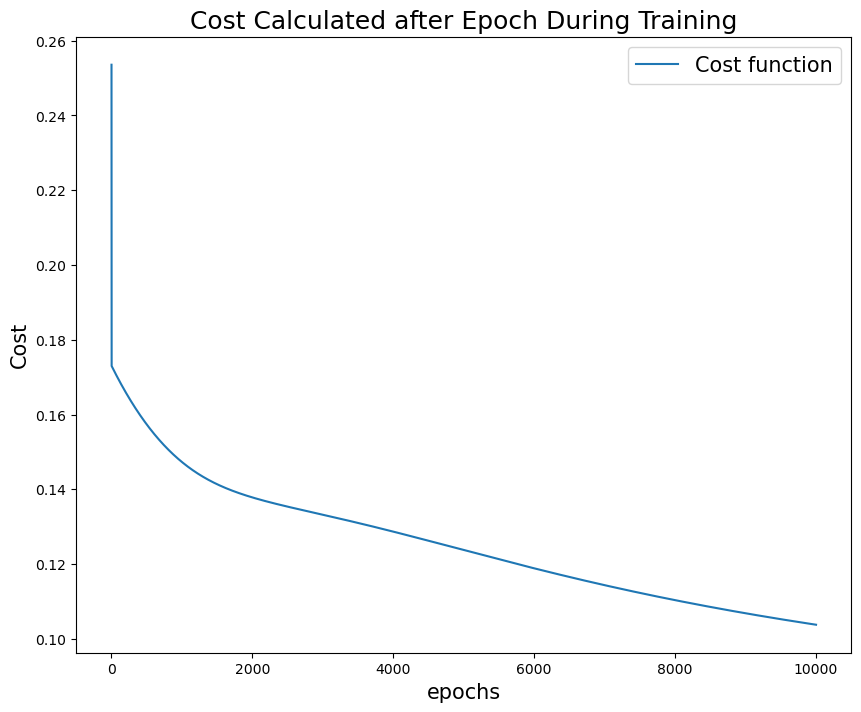

In [400]:
node.plot_cost_function()
plt.show()

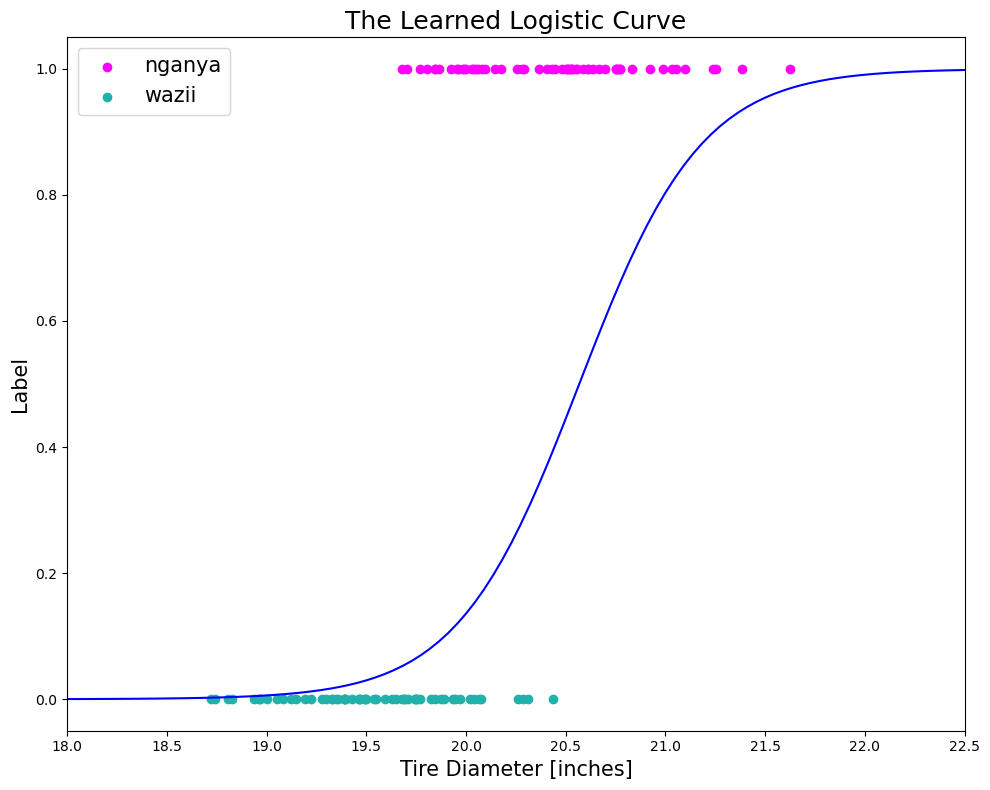

In [401]:
plt.figure(figsize=(10, 8))
plt.xlim((18.0, 22.5))

plt.scatter(wazii.Tire_Diameter, 
            np.ones(len(wazii)), 
            color="magenta", 
            label="nganya")

plt.scatter(nganya.Tire_Diameter, 
            np.zeros(len(nganya)), 
            color="lightseagreen", 
            label="wazii")

domain = np.linspace(18.0, 22.5, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color='blue')

plt.xlabel("Tire Diameter [inches]", fontsize=15)
plt.ylabel("Label", fontsize=15)
plt.legend(fontsize=15, loc="upper left")
plt.title("The Learned Logistic Curve", fontsize=18)
plt.tight_layout()
plt.show()


In [402]:
node.predict(X)

array([0.04788462, 0.64582807, 0.00784257, 0.08631383, 0.06903321,
       0.07713349, 0.01740744, 0.55469807, 0.02711254, 0.47247877,
       0.01738068, 0.45552534, 0.39258999, 0.49058487, 0.04022014,
       0.1761223 , 0.00898183, 0.44890023, 0.12494669, 0.47104917,
       0.00708447, 0.16893714, 0.05487418, 0.89936726, 0.00240901,
       0.53721277, 0.00605894, 0.09174084, 0.05396852, 0.60277978,
       0.11207822, 0.12186178, 0.05209147, 0.6475909 , 0.03481988,
       0.76010134, 0.02675094, 0.14816099, 0.00486608, 0.7041155 ,
       0.01465667, 0.51489625, 0.02128982, 0.65920495, 0.16764326,
       0.90340972, 0.06607064, 0.28791953, 0.00321152, 0.16098317,
       0.06432495, 0.13586929, 0.02372504, 0.14906492, 0.01559395,
       0.34102237, 0.09486693, 0.48864416, 0.16236601, 0.46506839,
       0.14344674, 0.66089059, 0.01233212, 0.37130622, 0.0264431 ,
       0.83001324, 0.0649615 , 0.28216155, 0.15160804, 0.96902361])

In [403]:
np.rint(node.predict(X)) != y

array([False, False, False,  True, False,  True, False, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True, False, False])

In [404]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.3


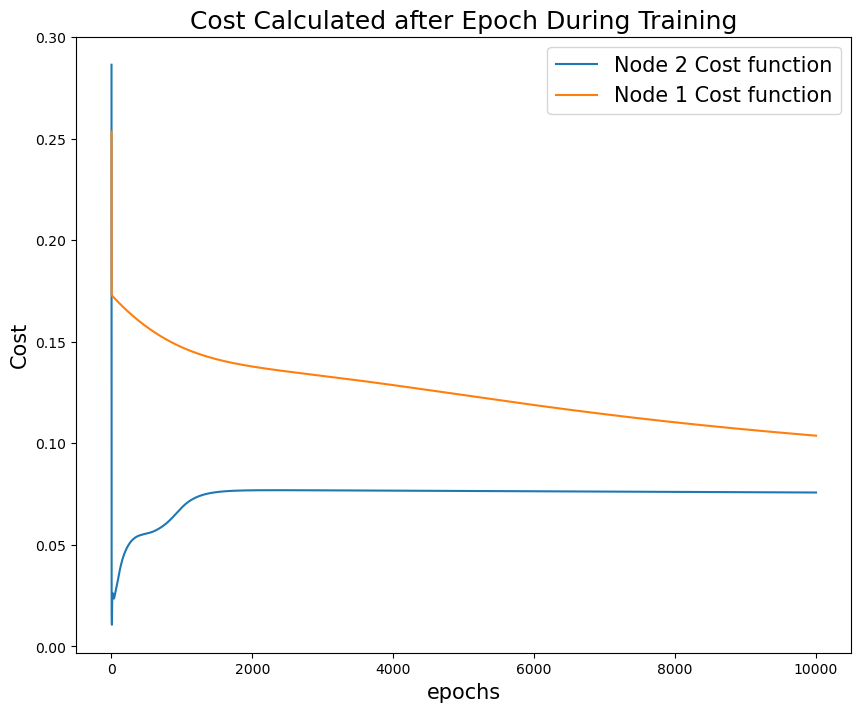

In [405]:
node_two  = SingleNeuron(sigmoid, cross_entropy_loss)
X_2 = df.iloc[50:][["Tire_Diameter", "Steering_Diameter"]].values
node_two.train(X_2, y, alpha = 0.01, epochs = 10_000)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(node_two.errors_) + 1),
            node_two.errors_,
            label = "Node 2 Cost function")
plt.plot(range(1, len(node.errors_) + 1),
            node.errors_,
            label = "Node 1 Cost function")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cost", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Cost Calculated after Epoch During Training", fontsize = 18)
plt.show()


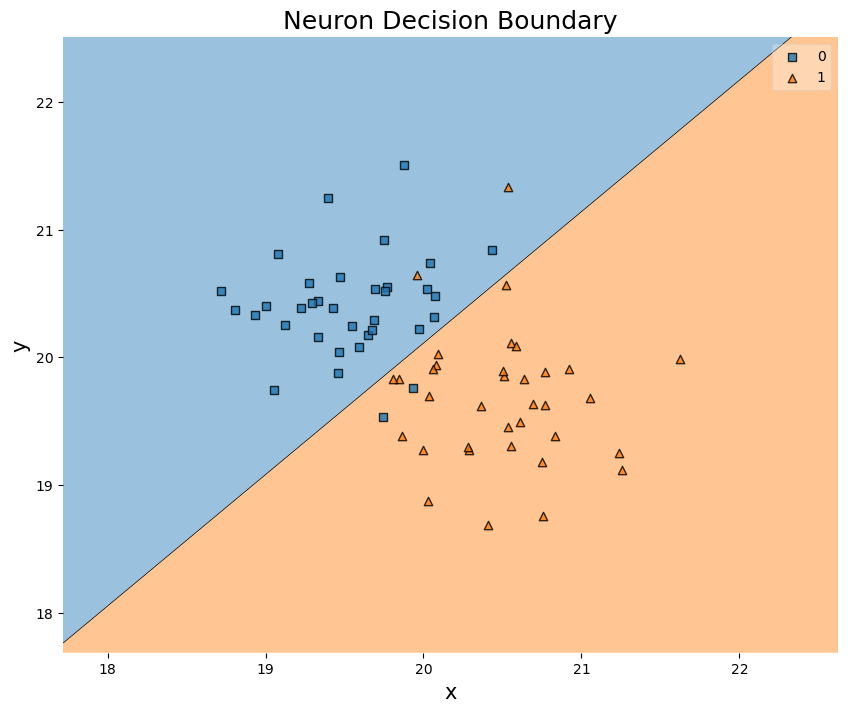

In [406]:
node_two.plot_decision_boundary(X_2, y)